# **Importing the Libraries**


In [37]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [38]:
print(f'matplotlib vesion: {matplotlib.__version__}')
print(f'pandas vesion:     {pd.__version__}')
print(f'numpy vesion:      {np.__version__}')
print(f'seaborn vesion:    {sns.__version__}')
print(f'sklearn vesion:    {skl.__version__}')

matplotlib vesion: 3.2.2
pandas vesion:     1.1.5
numpy vesion:      1.19.5
seaborn vesion:    0.11.1
sklearn vesion:    0.22.2.post1


## **Variables Definition:**

* **ID :** Unique ID
* **CountryCode :** Country Code
* **region_code :**  Region Code
* **year :** Year
* **sex :** Sex
* **agefrom :** Starting Age
* **ageto :** Finishing Age
* **percentage_no_schooling :** Percentage of No Schooling Attained in Pop.
* **percentage_primary_schooling :** Percentage of Primary Schooling Attained in Pop.
* **percentage_primary_schooling_completed :** Percentage of Complete Primary  Schooling Attained in Pop.
* **percentage_secondary_schooling :** Percentage of Secondary Schooling Attained in Pop.
* **percentage_secondary_schooling_completed :** Percentage of Complete Secondary Schooling Attained in Pop.
* **percentage_tertiary_schooling :** Percentage of Tertiary Schooling Attained in Pop.
* **percentage_tertiary_schooling_completed :** Percentage of Complete Tertiary Schooling Attained in Pop.
* **yr_sch :** Average Years of Schooling Attained
* **literate_pop :** Literate population
* **target = LR :** Literacy rate (in percentage)


# **Loading the Data**

In [39]:
train = pd.read_csv('/content/drive/MyDrive/Projects/Silicon Valley 21st Century Education Hackathon/Silicon_Valley_Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Projects/Silicon Valley 21st Century Education Hackathon/Silicon_Vally_Test.csv')
ss = pd.read_csv('/content/drive/MyDrive/Projects/Silicon Valley 21st Century Education Hackathon/SampleSubmission.csv')

In [40]:
train

,ID,countryCode,year,sex,agefrom,ageto,percentage_no_schooling,percentage_primary_schooling,percentage_primary_schooling_completed,percentage_secondary_schooling,percentage_secondary_schooling_completed,percentage_tertiary_schooling,percentage_tertiary_schooling_completed,yr_sch,region_code,literate_pop,target
0,ID_00AMK8K,155,1990,MF,15,999,8.3900,26.270000,15.830000,58.570000,26.420000,6.770000,4.400000,8.540000,Latin America and the Caribbean,7435.0,91.609167
1,ID_00ANS9C,115,2005,MF,25,999,0.6325,6.980833,6.363333,77.683333,49.995833,14.700833,13.546667,11.631667,Europe and Central Asia,14350.0,99.362969
2,ID_00AQU1S,30,2000,M,15,999,68.5300,26.320000,16.020000,4.620000,2.320000,0.540000,0.310000,1.550000,Sub-Saharan Africa,1458.0,31.469890
3,ID_00AVQ7Q,143,1960,MF,15,999,12.5300,69.370000,49.260000,8.130000,1.100000,9.970000,5.510000,7.490000,Latin America and the Caribbean,45.0,86.538462
4,ID_00BAH2C,70,1955,MF,25,999,20.9800,55.900000,22.380000,20.850000,10.240000,2.270000,1.950000,4.890000,Latin America and the Caribbean,2380.0,79.017264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,ID_99YTK0T,38,1950,MF,25,999,61.1825,20.794167,13.840833,15.994167,3.747500,2.030000,0.256667,3.115000,Sub-Saharan Africa,4565.0,38.818027
14012,ID_99ZDM2A,77,1990,MF,25,999,4.8800,55.140000,29.530000,30.080000,13.120000,9.900000,5.290000,7.130000,Latin America and the Caribbean,1720.0,95.080155
14013,ID_99ZMQ0L,98,1990,MF,15,999,5.2000,41.400000,21.520000,34.200000,16.560000,18.800000,6.730000,7.100000,East Asia and the Pacific,34077.0,94.398737
14014,ID_99ZNU2T,329,1990,M,25,999,4.5000,47.140000,23.710000,39.450000,27.560000,8.910000,6.220000,8.700000,Europe and Central Asia,2913.0,95.476893


# **Exploring and Transforming The Data**


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        14016 non-null  object 
 1   countryCode                               14016 non-null  int64  
 2   year                                      14016 non-null  int64  
 3   sex                                       14016 non-null  object 
 4   agefrom                                   14016 non-null  int64  
 5   ageto                                     14016 non-null  int64  
 6   percentage_no_schooling                   14016 non-null  float64
 7   percentage_primary_schooling              14016 non-null  float64
 8   percentage_primary_schooling_completed    14016 non-null  float64
 9   percentage_secondary_schooling            14016 non-null  float64
 10  percentage_secondary_schooling_com

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        1168 non-null   object 
 1   countryCode                               1168 non-null   int64  
 2   year                                      1168 non-null   int64  
 3   sex                                       1168 non-null   object 
 4   agefrom                                   1168 non-null   int64  
 5   ageto                                     1168 non-null   int64  
 6   percentage_no_schooling                   1168 non-null   float64
 7   percentage_primary_schooling              1168 non-null   float64
 8   percentage_primary_schooling_completed    1168 non-null   float64
 9   percentage_secondary_schooling            1168 non-null   float64
 10  percentage_secondary_schooling_compl

In [43]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
countryCode,14016.0,112.212329,90.990390,1.000000,50.000000,91.500000,131.000000,3.580000e+02
year,14016.0,1977.500000,17.260878,1950.000000,1963.750000,1977.500000,1991.250000,2.005000e+03
agefrom,14016.0,20.000000,5.000178,15.000000,15.000000,20.000000,25.000000,2.500000e+01
ageto,14016.0,999.000000,0.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
percentage_no_schooling,14016.0,35.058990,30.836316,0.003333,6.200000,26.387917,60.120833,1.000000e+02
percentage_primary_schooling,14016.0,35.081346,20.827921,0.000000,17.710000,34.035000,49.870000,9.438000e+01
percentage_primary_schooling_completed,14016.0,18.336662,14.543279,0.000000,6.830000,15.235000,26.315000,8.526667e+01
percentage_secondary_schooling,14016.0,24.148922,20.248127,0.000000,6.820000,19.150000,37.650833,9.394333e+01
percentage_secondary_schooling_completed,14016.0,12.448905,13.100393,0.000000,2.470000,7.640000,18.760000,7.726000e+01
percentage_tertiary_schooling,14016.0,5.708469,7.103030,0.000000,0.850000,2.980000,8.150000,5.729000e+01


In [44]:
train.ageto.value_counts()

999    14016
Name: ageto, dtype: int64

In [45]:
train.year.value_counts()

1975    1168
1990    1168
1950    1168
2005    1168
1965    1168
1980    1168
1995    1168
1955    1168
1970    1168
1985    1168
2000    1168
1960    1168
Name: year, dtype: int64

In [46]:
test.year.value_counts()  

2010    1168
Name: year, dtype: int64

The ageto and year columns are not usefull for our analysis

In [47]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)

In [48]:
#droping the redundant columns 
all_data.drop(['ageto','year'],axis=1,inplace=True)

In [49]:
cat_cols = ['sex','agefrom','countryCode','region_code']    #categorical columns 
num_cols = all_data.columns.difference(cat_cols+['ID'])     #numerical columns

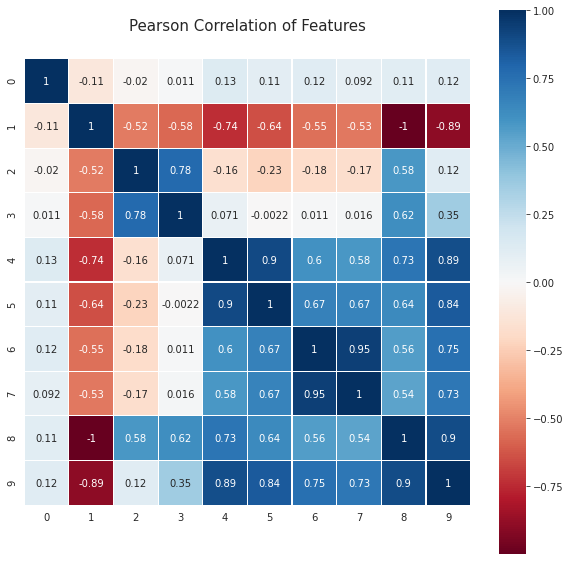

In [50]:
#checking the correlations between numerical varaibles 
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
corr_train = all_data[num_cols]
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_train.corr().values,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

There are a lot of features with a strong correleation.

In [51]:
#creating new features which could be usefull
all_data['all_percentage_schooling'] = all_data.percentage_primary_schooling + all_data.percentage_secondary_schooling + all_data.percentage_tertiary_schooling
all_data['all_percentage_schooling_completed'] = all_data.percentage_primary_schooling_completed + all_data.percentage_secondary_schooling_completed + all_data.percentage_tertiary_schooling_completed
all_data['completed_percentage_ratio'] = all_data['percentage_no_schooling']/all_data['all_percentage_schooling_completed']

In [52]:
#filling the vlaues eqaul to infinity with the average finite values 
mean_ratio = all_data.loc[~np.isinf(all_data['completed_percentage_ratio']),'completed_percentage_ratio'].mean()
all_data.loc[np.isinf(all_data['completed_percentage_ratio']),'completed_percentage_ratio'] = mean_ratio

In [53]:
encoder = LabelEncoder()

for col in ['sex','countryCode']:
  all_data[col] = encoder.fit_transform(all_data[col])

# **Bulding Model**

In [54]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((14016, 18), (1168, 18))

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        14016 non-null  object 
 1   countryCode                               14016 non-null  int64  
 2   year                                      14016 non-null  int64  
 3   sex                                       14016 non-null  object 
 4   agefrom                                   14016 non-null  int64  
 5   ageto                                     14016 non-null  int64  
 6   percentage_no_schooling                   14016 non-null  float64
 7   percentage_primary_schooling              14016 non-null  float64
 8   percentage_primary_schooling_completed    14016 non-null  float64
 9   percentage_secondary_schooling            14016 non-null  float64
 10  percentage_secondary_schooling_com

In [56]:
#Selecting the most relevant features 
features = ['percentage_no_schooling','literate_pop','all_percentage_schooling']

X = train_df[features]
y = train_df['target']

In [57]:
#Generate polynomial and interaction features.
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

X.shape

(14016, 10)

In [58]:
# xgb = XGBRegressor(n_estimators=10000)
# rf = RandomForestRegressor(n_estimators=400, max_depth=22,random_state=0)
# lr = LinearRegression()

# model = VotingRegressor([('xgb',xgb),('rf',rf)])

In [59]:
model = RandomForestRegressor(n_estimators=400,
                              max_depth=22,
                              min_samples_leaf=2,
                              min_samples_split=3,
                              random_state=0)


# Create a StratifiedKFold object
kf = KFold(n_splits=5, shuffle=True, random_state=123)

fold_metrics = []
n_fold = 1
for train_index, test_index in kf.split(X):
  cv_train, cv_test = X[train_index], X[test_index]
  y_train_cv, y_test_cv = y[train_index], y[test_index]
  # Train a model
  model.fit(cv_train,y_train_cv)
  # Make predictions
  predictions = model.predict(cv_test)
  # Calculate the metric
  metric = mean_absolute_error(y_test_cv, predictions)
  fold_metrics.append(metric)
  print(f'Fold {n_fold}: Done')
  n_fold += 1

np.mean(fold_metrics), np.std(fold_metrics)

Fold 1: Done
Fold 2: Done
Fold 3: Done
Fold 4: Done
Fold 5: Done


(0.07579184226523387, 0.007396198190125578)

In [60]:
#saving the score to add it to submission file name to help us track the local validation score with the score in the leaderboard
Local_Val = round(np.mean(fold_metrics),4)

In [61]:
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [62]:
# importance = model.feature_importances_

# importance_df = pd.DataFrame({'feature':X.columns,
# 'importance':importance})
# importance_df.sort_values('importance',ascending = False,inplace=True)

# f, ax = plt.subplots(figsize = (15,6))
# ax = sns.barplot(data=importance_df,x='feature', y = 'importance',
# palette="Blues_d")
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# **Making Submission File**

In [63]:
X_test = poly.transform(test_df[features])
#making predcition
prediction = model.predict(X_test)
ss.target = prediction

In [64]:
# Create a csv file and upload to zindi 
ss.to_csv(f'Silicon_Vally_sub({Local_Val}).csv', index = False)